# Clustering - Spotify Min-Max Scaled Dataset
Este notebook aplica KMeans sobre `spotify_minmax.csv`.

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Cargar datos
df = pd.read_csv("../data/processed/spotify_minmax.csv")
features = df.columns.tolist()


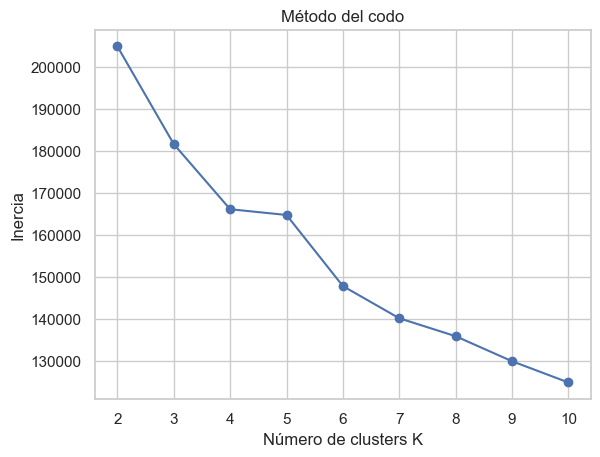

In [2]:
# Método del codo para elegir K
inertia = []
K_range = range(2, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df)
    inertia.append(km.inertia_)

plt.plot(K_range, inertia, 'o-')
plt.xlabel("Número de clusters K")
plt.ylabel("Inercia")
plt.title("Método del codo")
plt.show()

In [3]:
# Entrenar KMeans con K=4 (por ejemplo)
k = 4
km = KMeans(n_clusters=k, random_state=42)
df['cluster'] = km.fit_predict(df)

# Conteo por cluster
df['cluster'].value_counts().sort_index()

cluster
0     78881
1    139083
2    141552
3     99566
Name: count, dtype: int64

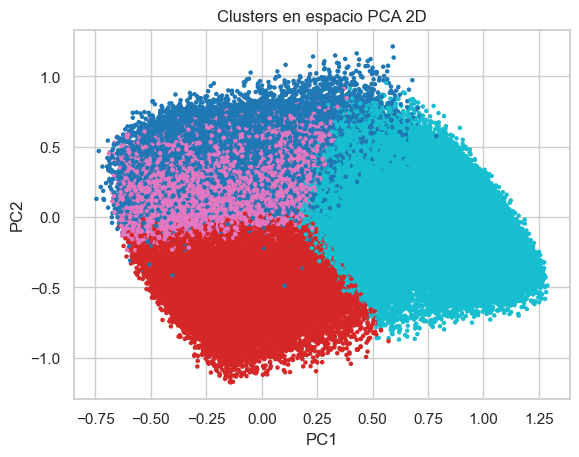

In [4]:
# Visualización PCA 2D
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
coords = pca.fit_transform(df.drop('cluster', axis=1))
plt.scatter(coords[:,0], coords[:,1], c=df['cluster'], cmap='tab10', s=5)
plt.title("Clusters en espacio PCA 2D")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()